In [46]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
np.random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

## MNIST dataset

* torchvision.dataset에서 여러 dataset을 받을 수 있음
  * `root` : 디렉토리
  * `train` : True 면 훈련데이터 False면 테스트데이터
  * `transform` : 적용할 transform
  * `download` : 없으면 download
* attributes
  * `dataset_train.data` : 데이터
  * `dataset_train.targets` : 레이블
  * `dataset_classes` : 클래스 정보

In [18]:
dataset_train = torchvision.datasets.MNIST(root='', train=True, transform=transforms.ToTensor())
dataset_test = torchvision.datasets.MNIST(root='', train=False, transform=transforms.ToTensor())

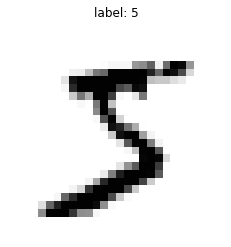

In [39]:
X, y = dataset_train[0]
plt.imshow(X[0], cmap='Greys')
plt.title(f'label: {y}')
plt.axis('off')
plt.show()

## Training Example

In [49]:
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

In [47]:
class SimpleClassifier(nn.Module):
    
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.layer = nn.Linear(28*28, 10)
    
    def forward(self, X):
        return self.layer(X)

In [62]:
# hyperparameters
training_epochs = 15
batch_size = 100
lr = 0.1

model = SimpleClassifier().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

print('Start training...')

for epoch in range(1, training_epochs+1):
    
    running_loss = 0
    running_correct = 0
    
    for X, y in dataloader_train:
        X, y = X.view(-1,28*28).to(device), y.to(device)
        y_pred = model(X)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            running_loss += loss.item()
            running_correct += sum(y_pred.argmax(dim=1) == y)
    
    running_test_loss = 0
    running_test_correct = 0
    
    with torch.no_grad():
        for X, y in dataloader_test:
            X, y = X.view(-1,28*28).to(device), y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y)

            running_test_loss += loss.item()
            running_test_correct += sum(y_pred.argmax(dim=1) == y)
    
    print(f'epoch {epoch}\
    training loss:{running_loss/len(dataloader_train):.3f}\
    training acc:{running_correct/len(dataloader_train):.3f}\
    test loss:{running_test_loss/len(dataloader_test):.3f}\
    test acc:{running_test_correct/len(dataloader_test):.3f}')

print('Finished Training')

Start training...
epoch 1    training loss:0.537    training acc:86.533    test loss:0.362    test acc:90.290
epoch 2    training loss:0.359    training acc:90.077    test loss:0.324    test acc:91.250
epoch 3    training loss:0.331    training acc:90.775    test loss:0.309    test acc:91.600
epoch 4    training loss:0.316    training acc:91.162    test loss:0.298    test acc:91.750
epoch 5    training loss:0.307    training acc:91.443    test loss:0.293    test acc:91.910
epoch 6    training loss:0.300    training acc:91.590    test loss:0.289    test acc:92.040
epoch 7    training loss:0.295    training acc:91.792    test loss:0.286    test acc:92.100
epoch 8    training loss:0.291    training acc:91.898    test loss:0.284    test acc:92.120
epoch 9    training loss:0.287    training acc:91.980    test loss:0.280    test acc:92.100
epoch 10    training loss:0.284    training acc:92.105    test loss:0.281    test acc:92.150
epoch 11    training loss:0.282    training acc:92.205    tes